In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_24646_U')

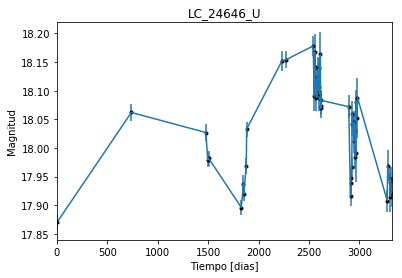

In [2]:
data = np.genfromtxt('LC_24646_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_24646_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

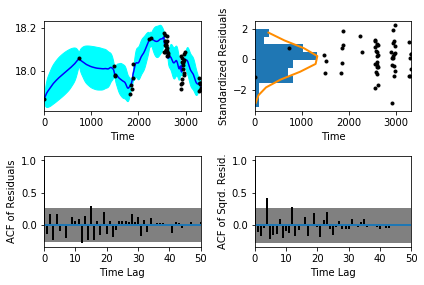

In [5]:
sample.assess_fit()

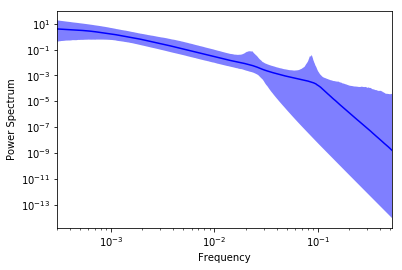

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0375889,'Medida del nivel de ruido')

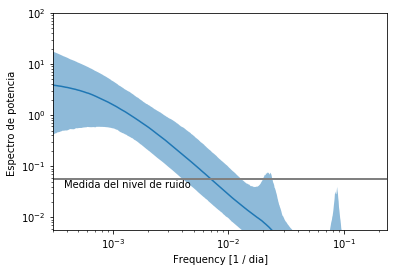

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

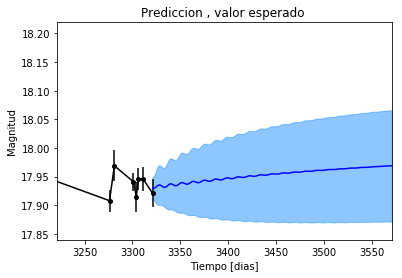

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


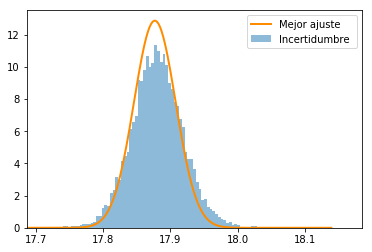

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

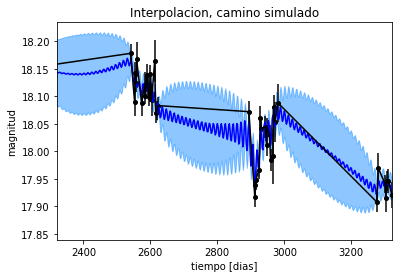

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

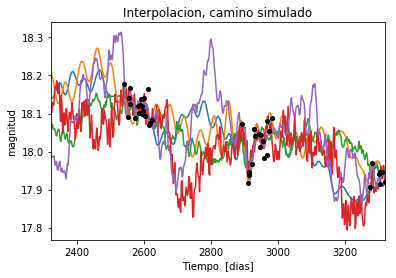

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 7947.43944441
Median: 0.00872573716896
Standard deviation: 0.181089416249
68% credibility interval: [ 0.00158571  0.14710039]
95% credibility interval: [  5.27471621e-04   7.40662354e-01]
99% credibility interval: [  3.56203590e-04   9.66518539e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 352.434147225
Median: 0.00564536430848
Standard deviation: 0.116394530927
68% credibility interval: [ 0.0011283   0.06760047]
95% credibility interval: [ 0.0004258  0.4119334]
99% credibility interval: [  3.22090341e-04   8.47618265e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 568.334946652
Median: 0.10166848731
Standard devi

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2018.68536355
Median: 114.461894701
Standard deviation: 2.20185601693
68% credibility interval: [ 112.32447719  116.73151832]
95% credibility interval: [ 109.66253207  118.28632149]
99% credibility interval: [ 107.77751398  118.88474418]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 569.659474086
Median: 1.19381606994
Standard deviation: 2.67150888267
68% credibility interval: [ 0.19969094  5.07678768]
95% credibility interval: [ 0.04495798  9.05841744]
99% credibility interval: [  0.02193489  12.96216228]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 426.74440002
Median: 0.636987213481
Standard deviation: 13.3318871394
68% credibility interval: [  0.0688923   13.79991523]
95% credibility interval: [  1.93698772e

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0590045
Median: 2.65784540763e-58
Standard deviation: 2.2991517305e+68
68% credibility interval: [  9.28628709e-150   7.14135417e-006]
95% credibility interval: [  6.68756873e-206   9.30798280e+024]
99% credibility interval: [  3.28608421e-221   1.05157615e+037]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1040.40500068
Median: 18.0126934606
Standard deviation: 0.0477398078291
68% credibility interval: [ 17.96584945  18.05150379]
95% credibility interval: [ 17.91010294  18.09938722]
99% credibility interval: [ 17.86564608  18.15074333]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 14889.2468144
Median: 0.0865465005214
Standard deviation: 0.258003655751
68% credibility interval: [ 0.01985969  0.42057207]
95% credibility interval: [ 0.          0.93865091]
99% credibility interval: [ 0.          1.02726748]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 14889.2468144
Median: 0.0865465005214
Standard deviation: 0.258003655751
68% credibility interval: [ 0.01985969  0.42057207]
95% credibility interval: [ 0.          0.93865091]
99% credibility interval: [ 0.          1.02726748]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 902.509439868
Median: 0.0
Standard deviation: 0.000533834914192
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2018.68536355
Median: 114.461894701
Standard deviation: 2.20185601693
68% credibility interval: [ 112.32447719  116.73151832]
95% credibility interval: [ 109.66253207  118.28632149]
99% credibility interval: [ 107.77751398  118.88474418]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 642.906350862
Median: 0.0117392831605
Standard deviation: 0.00850646263191
68% credibility interval: [ 0.00735692  0.01987468]
95% credibility interval: [ 0.00510832  0.0357574 ]
99% credibility interval: [ 0.0039936   0.05315002]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 877.844438368
Median: 1.1114641908
Standard deviation: 0.211525352804
68% credibility interval: [ 0.91747301  1.33569364]
95% credibility interval: [ 0.77400675  1.6031086 ]
99% credibility interval: [ 0.70601339  1.77322243]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 454.579972638
Median: 0.00217860696119
Standard deviation: 0.368536470238
68% credibility interval: [  1.88881958e-05   7.79982028e-02]
95% credibility interval: [  3.71113709e-28   7.28628075e-01]
99% credibility interval: [  4.81964695e-40   2.13753672e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 7947.43944441
Median: (-0.0548254235743-0.519842912857j)
Standard deviation: 1.9805419662
68% credibility interval: [-0.92425899-2.06064434j -0.00996333-0.57940705j]
95% credibility interval: [ -4.65371882e+00+0.j        -3.31420194e-03-0.551101j]
99% credibility interval: [ -6.07281509e+00+0.j          -2.23809316e-03-0.12765238j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 352.434147225
Median: (-0.0354708700767+1.5073511656j)
Standard deviation: 1.77841420906
68% credibility interval: [-0.42474628+4.21963237j -0.00708930+2.09276775j]
95% credibility interval: [-2.58825391+4.00931208j -0.00267535+0.14700272j]
99% credibility interval: [ -5.32574263e+00+3.92442584j  -2.02375330e-03+0.j        ]
Posterior summary f